# Lab 03 - Extended Exercises on Mixed Models

We recommend using Noto for this lecture tutorial, where we've already installed the dependencies of the pymer4 package and statsmodels.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import the linear regression model class
from pymer4.models import Lm

# Import the lmm model class
from pymer4.models import Lmer

# Import Gaussian modeling
import statsmodels.formula.api as smf

import scipy as sp
from scipy import stats

# Data directory
DATA_DIR = "./../../data/"

In [2]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'lab-03',
    'session_owner': 'mlbd',
    'sender_name': input("Your name: "),
}

Your name:  Olivia


## Introduction
The data has already been cleaned and it comes from 810 students in 3 different groups in a course of 13 weeks.

In this lab you will explore different models to explain the quiz grade. 

In [3]:
# Load data
df= pd.read_csv(f'{DATA_DIR}grades_in_time.csv.gz')
send(len(df),0)
df.head()

,student,week,studying_hours,group,quiz_grade
0,0,0,39.9,3,6.1
1,0,1,32.4,3,7.0
2,0,2,17.5,3,6.9
3,0,3,16.0,3,7.0
4,0,4,15.9,3,7.2


In [4]:
df.describe(include='all')

,student,week,studying_hours,group,quiz_grade
count,810.000000,810.000000,810.000000,810.000000,810.000000
mean,14.500000,13.000000,10.050617,1.933333,6.931975
std,8.660789,7.793693,8.270041,0.772199,1.336888
min,0.000000,0.000000,1.000000,1.000000,1.200000
25%,7.000000,6.000000,5.700000,1.000000,6.400000
50%,14.500000,13.000000,7.800000,2.000000,7.200000
75%,22.000000,20.000000,11.100000,3.000000,7.800000
max,29.000000,26.000000,64.000000,3.000000,10.100000


# Task 1: Linear Model
----------
### 1.1 Preprocess the data to run a regression model to explain the effect of studying hours on quiz grade.  

In [7]:
df.isna().sum()

student           0
week              0
studying_hours    0
group             0
quiz_grade        0
dtype: int64

In [12]:
df['normalized_studying_hours'] = (df['studying_hours'] - df['studying_hours'].mean()) / df['studying_hours'].std()
df['normalized_quiz_grade'] = (df['quiz_grade'] - df['quiz_grade'].mean()) / df['quiz_grade'].std()
df

,student,week,studying_hours,group,quiz_grade,normalized_studying_hours,normalized_quiz_grade
0,0,0,39.9,3,6.1,3.609339,-0.622322
1,0,1,32.4,3,7.0,2.702451,0.050883
2,0,2,17.5,3,6.9,0.900767,-0.023918
3,0,3,16.0,3,7.0,0.719390,0.050883
4,0,4,15.9,3,7.2,0.707298,0.200484
...,...,...,...,...,...,...,...
805,29,22,10.4,2,8.3,0.042247,1.023290
806,29,23,8.9,2,8.2,-0.139131,0.948490
807,29,24,9.3,2,8.1,-0.090763,0.873689
808,29,25,10.4,2,8.1,0.042247,0.873689


### 1.2 Explain your preprocessing steps

In [13]:
answer = """
Normalize columns"""

send(answer, 12) 

<Response [200]>

### 1.3 Run a regression model to explain the effect of studying hours on quiz grade.  

In [43]:
model_str = "normalized_quiz_grade ~ 1 + normalized_studying_hours"
send(model_str, 13)
# Add the data and family
model = Lm(model_str, data=df, family='gaussian')

# Fit the models
print(model.fit())

Formula: normalized_quiz_grade~1+normalized_studying_hours

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.204	 R^2_adj: 0.203

Log-likelihood: -1056.509 	 AIC: 2117.017	 BIC: 2126.411

Fixed effects:

                           Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  \
Intercept                     0.000  -0.062    0.062  0.031  808   0.000   
normalized_studying_hours     0.452   0.390    0.513  0.031  808  14.384   

                           P-val  Sig  
Intercept                    1.0       
normalized_studying_hours    0.0  ***  


### 1.4 What model family (poisson, logistic, etc) did you use and why? 

In [15]:
answer = """
gaussian (linear) since quiz grade is continuous"""

send(answer, 14) 

<Response [502]>

### 1.5 Interpret the regression results. 
Do the variables have a positive or negative effect? Is it significant?

In [18]:
answer = """
positive, yes normalized studying hours has p val of 0"""

send(answer, 15) 

<Response [200]>

### 1.6 Is this an appropriate method? Explain why or why not.

In [20]:
answer = """
Your answer here.
"""

send(answer, 16) 

<Response [200]>

# Task 2: Linear Model with Fixed Effects
----------
### 2.1  Run a regression model to explain the effect of studying hours on quiz grade. Add fixed effects for group. 

In [42]:
model_str = "normalized_quiz_grade ~ 1 + group + normalized_studying_hours"
send(model_str, 21)
# Add the data and family
model = Lm(model_str, data=df, family='gaussian' )
# Fit the models
print(model.fit())

Formula: normalized_quiz_grade~1+group+normalized_studying_hours

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.224	 R^2_adj: 0.222

Log-likelihood: -1046.040 	 AIC: 2098.080	 BIC: 2112.171

Fixed effects:

                           Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  \
Intercept                    -0.357  -0.521   -0.193  0.084  807  -4.270   
group                         0.185   0.106    0.264  0.040  807   4.597   
normalized_studying_hours     0.457   0.396    0.518  0.031  807  14.738   

                           P-val  Sig  
Intercept                    0.0  ***  
group                        0.0  ***  
normalized_studying_hours    0.0  ***  


### 2.2 Interpret the regression results. 
What changed? What does it mean to have group fixed effects? 

In [22]:
answer = """
Negative intercept, prediciton changes depending on which group the students are in
"""

send(answer, 22) 

<Response [200]>

# Task 3: Linear Model with Random Effects
----------
### 3.1  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept for group. 

In [34]:
# intercept per group
model_str = "normalized_quiz_grade ~ 1 + (1|group) + normalized_studying_hours"
send(model_str, 31)
# Add the data and family
model = Lmer(model_str, data=df, family='gaussian')

# Fit the models
print(model.fit())

Formula: normalized_quiz_grade~(1|group)+normalized_studying_hours

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1048.309 	 AIC: 2096.619

Random effects:

                 Name    Var    Std
group     (Intercept)  0.047  0.216
Residual               0.766  0.875

No random effect correlations specified

Fixed effects:

                           Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  \
(Intercept)                  -0.004  -0.256    0.248  0.129    2.004  -0.031   
normalized_studying_hours     0.483   0.421    0.545  0.032  807.849  15.263   

                           P-val  Sig  
(Intercept)                0.978       
normalized_studying_hours  0.000  ***  


### 3.2 Plot the regression lines
Hint: You may use model.plot

<AxesSubplot:xlabel='normalized_studying_hours', ylabel='normalized_quiz_grade'>

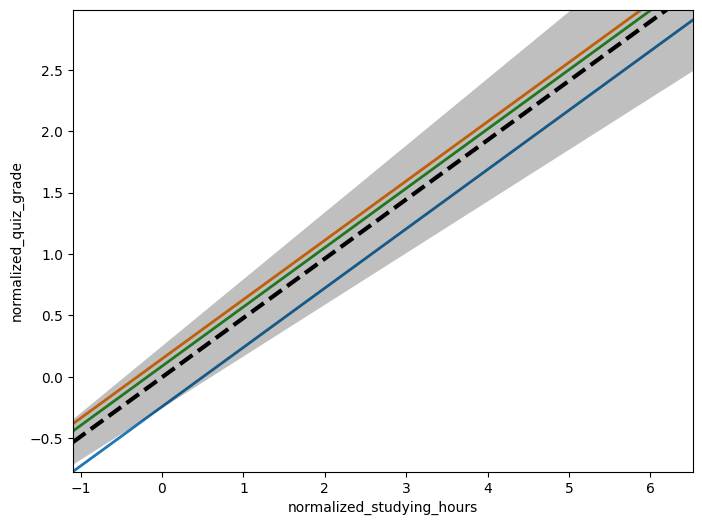

In [35]:
model.plot("normalized_studying_hours")

### 3.3  Run a regression model to explain the effect of studying hours on quiz grade. Add slope for group. 

In [45]:
model_str = "normalized_quiz_grade ~ (0 + normalized_studying_hours|group)"
send(model_str, 33)
# Add the data and family
model = Lmer(model_str, data=df, family='gaussian' )

# Fit the models
print(model.fit())

Formula: normalized_quiz_grade~(0+normalized_studying_hours|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -995.353 	 AIC: 1990.706

Random effects:

                               Name    Var    Std
group     normalized_studying_hours  0.203  0.451
Residual                             0.670  0.819

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  P-val Sig
(Intercept)    -0.059  -0.124    0.006  0.033  739.487   -1.78  0.075   .


### 3.4 Plot the regression lines
Hint: You may use model.ranef

In [46]:
model.ranef.head()

,normalized_studying_hours
1,0.764508
2,-0.007528
3,0.044192


### 3.5  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for group. 

In [48]:
model_str = "normalized_quiz_grade ~ (1+ normalized_studying_hours | group)" 
send(model_str, 35)
# Add the data and family
model = Lmer(model_str, data=df, family='gaussian' )

# Fit the models
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Formula: normalized_quiz_grade~(1+normalized_studying_hours|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -970.659 	 AIC: 1941.318

Random effects:

                               Name    Var    Std
group                   (Intercept)  0.092  0.303
group     normalized_studying_hours  0.230  0.479
Residual                             0.629  0.793

               IV1                        IV2  Corr
group  (Intercept)  normalized_studying_hours  -1.0

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  P-val  Sig
(Intercept)     0.185   0.112    0.258  0.037  359.051    4.97    0.0  ***


### 3.6 Plot the regression lines

In [57]:
model.ranef

,X.Intercept.,normalized_studying_hours
1,-0.507915,0.801923
2,-0.124181,0.196064
3,-0.013755,0.021716


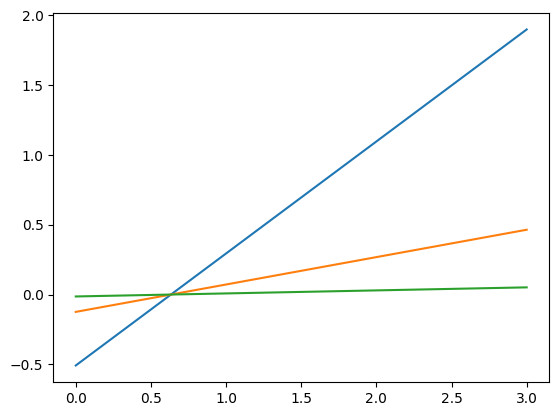

In [61]:

x = np.linspace(0,3,4)
for i,row in model.ranef.iterrows():
    sns.lineplot(x=x,y=(row['X.Intercept.']+row['normalized_studying_hours']*x))

### 3.7 Interpret the regression results. 
What changed? What does it mean to have group random effects? 

In [230]:
answer = """
Your answer here. 
"""

send(answer, 37) 

<Response [200]>

# Task 4: Mixed Model with Time Interaction 
----------
### 4.1  Lastly, run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for groups AND interaction between the number of stuyding hours and time (weeks). 


In [64]:
# model_str = "normalized_quiz_grade ~ (1+ (normalized_studying_hours * week) | group)" 
model_str = "normalized_quiz_grade ~ (0 + (normalized_studying_hours * week) | group)" 
send(model_str, 41)
# Add the data and family
model = Lmer(model_str, data=df, family='gaussian')

# Fit the models
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Formula: normalized_quiz_grade~(1+(normalized_studying_hours*week)|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -610.459 	 AIC: 1220.917

Random effects:

                                    Name    Var    Std
group                        (Intercept)  0.718  0.847
group          normalized_studying_hours  0.783  0.885
group                               week  0.006  0.078
group     normalized_studying_hours:week  0.003  0.052
Residual                                  0.250  0.500

                             IV1                             IV2   Corr
group                (Intercept)       normalized_studying_hours -0.722
group                (Intercept)                            week -0.974
group                (Intercept)  normalized_studying_hours:week -0.061
group  normalized_studying_hours                            week  0.590
group  normalized_studying_hour

### 4.2 Interpret the regression results.  

In [38]:
answer = """
Your answer here.
"""

send(answer, 42) 

<Response [200]>